In [112]:

import cv2
from cv2 import sqrt
import numpy as np
import os
import matplotlib.pyplot as plt

In [44]:
def DeleteTrash(pathTxtFile):
    with open (pathTxtFile, 'r') as f:
        old_data = f.read()
        new_data = old_data.replace('[', '')
        new_data = new_data.replace(']', '')
        new_data = new_data.replace(',', '')
        new_data = new_data.replace(';', '')
        new_data = new_data.replace('(', '')
        new_data = new_data.replace(')', '')
    with open (pathTxtFile, 'w') as f:
        f.write(new_data)

In [45]:
DeleteTrash(r"./CoordinateLogVideo32.txt") 
FindCord = np.loadtxt(r"./CoordinateLogVideo32.txt")

BlenderCord = np.loadtxt(r"LogBlenderCoord.txt", delimiter=',')
#BlenderCord[:,2] = BlenderCord[:,2] +  0.05

cameraMatrix = np.array( [
    [2666.6666666666665, 0, 960.0],
    [0, 2666.6666666666665, 540.0], 
    [0, 0, 1] 
    ] )
distCoeffs = np.array( [ 0.0,0.0,0.0,0.0 ] )
Rx = np.array([
    [ -1.0, 0.0, 0.0],
    [ 0.0, -1.0, 0.0],
    [ 0.0, 0.0, 1.0] 
    ])# Rotation matrix
T = np.array([ 0.0, 0.0, 0.0]) #Transpose matrix

rvecR, jacobianRotation = cv2.Rodrigues(Rx)

In [46]:
imageFindPoint, jacobianProjectFind = cv2.projectPoints(FindCord, rvecR, T, cameraMatrix, distCoeffs)
imageBlenderPoint, jacobianProjectBlender = cv2.projectPoints(BlenderCord, rvecR, T, cameraMatrix, distCoeffs)


In [110]:
pixelError = imageBlenderPoint - imageFindPoint


In [149]:
xValuesPx = pixelError[:,0,0]
yValuesPx = pixelError[:,0,1]


In [150]:
FindCord[:,0] - BlenderCord[:,0]

array([-0.0492797 , -0.04933551, -0.04486849, -0.0393219 , -0.0376363 ,
       -0.0350809 , -0.02867131, -0.02585359, -0.0221701 , -0.0220377 ,
       -0.0176964 , -0.01410345, -0.01190615, -0.0085378 , -0.0058669 ,
       -0.00439152, -0.00237635,  0.00086886,  0.00262427,  0.00502874,
        0.00785003,  0.00895512,  0.01173295,  0.01495532,  0.0160968 ,
        0.018733  ,  0.02147265,  0.02560665,  0.0262964 ,  0.0307713 ,
        0.0344679 ,  0.03999709])

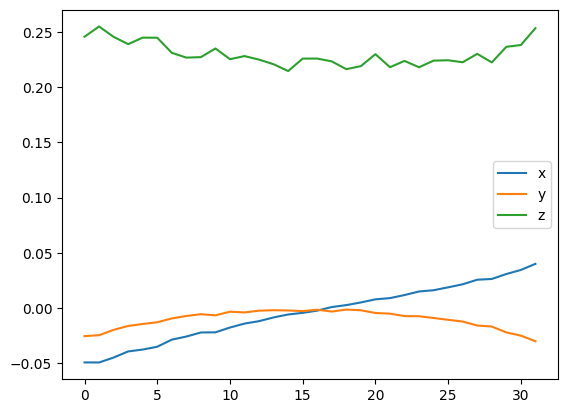

In [151]:
xFindCord = FindCord[:,0] - BlenderCord[:,0]
yFindCord = FindCord[:,1] - BlenderCord[:,1]
zFindCord = FindCord[:,2] - BlenderCord[:,2]
plt.plot(xFindCord, label = 'x')
plt.plot(yFindCord, label = "y")
plt.plot(zFindCord, label = "z")
plt.legend()

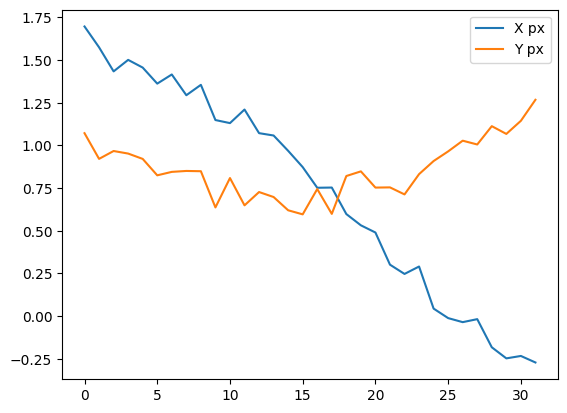

In [152]:
plt.plot(xValuesPx, label = "X px")
plt.plot(yValuesPx, label = "Y px")
plt.legend()